# Context
> Forecasts aren’t just for meteorologists. Governments forecast economic growth. Scientists attempt to predict the future population. And businesses forecast product demand—a common task of professional data scientists. Forecasts are especially relevant to brick-and-mortar grocery stores, which must dance delicately with how much inventory to buy. Predict a little over, and grocers are stuck with overstocked, perishable goods. Guess a little under, and popular items quickly sell out, leading to lost revenue and upset customers. More accurate forecasting, thanks to machine learning, could help ensure retailers please customers by having just enough of the right products at the right time.
> 
> Current subjective forecasting methods for retail have little data to back them up and are unlikely to be automated. The problem becomes even more complex as retailers add new locations with unique needs, new products, ever-transitioning seasonal tastes, and unpredictable product marketing.

Submission File
For each id in the test set, you must predict a value for the sales variable. The file should contain a header and have the following format:


* id,sales
* 3000888,0.0
* 3000889,0.0
* 3000890,0.0
* 3000891,0.0
* 3000892,0.0
* etc.
* 

In [133]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [134]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os.path
from datetime import datetime

In [135]:
holidays=pd.read_csv('../input/store-sales-time-series-forecasting/holidays_events.csv')
oil=pd.read_csv('../input/store-sales-time-series-forecasting/oil.csv')
stores=pd.read_csv('../input/store-sales-time-series-forecasting/stores.csv')
test=pd.read_csv('../input/store-sales-time-series-forecasting/test.csv')
train=pd.read_csv('../input/store-sales-time-series-forecasting/train.csv')
transactions=pd.read_csv('../input/store-sales-time-series-forecasting/transactions.csv')

In [136]:
test1=pd.read_csv('../input/store-sales-time-series-forecasting/test.csv') #creating another copy of test data 

In [137]:
#Merging all available datasets to perform exploratory data analysis
t1=pd.merge(holidays,oil)
t2=pd.merge(train,stores)
t3=pd.merge(t2,transactions)
df=pd.merge(t3,t1,on="date")

In [138]:
df.head()


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,562,2013-01-01,25,BABY CARE,0.0,0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,563,2013-01-01,25,BEAUTY,2.0,0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,564,2013-01-01,25,BEVERAGES,810.0,0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,565,2013-01-01,25,BOOKS,0.0,0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN


# Experimenting with data

In [139]:
df.describe()


,id,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico
count,3.220470e+05,322047.000000,322047.000000,322047.000000,322047.000000,322047.000000,300003.000000
mean,1.682979e+06,26.994672,406.383452,3.727136,8.531202,1734.117840,64.077912
std,7.862493e+05,15.595174,1246.881240,15.512095,4.713809,1050.335018,25.147682
min,5.610000e+02,1.000000,0.000000,0.000000,1.000000,54.000000,27.960000
25%,1.010616e+06,13.000000,1.000000,0.000000,4.000000,1030.000000,44.660000
50%,1.842406e+06,27.000000,19.000000,0.000000,9.000000,1409.000000,51.440000
75%,2.209556e+06,40.000000,241.260505,1.000000,13.000000,2148.000000,94.740000
max,3.000887e+06,54.000000,124717.000000,716.000000,17.000000,8359.000000,107.950000


In [140]:
#Replacing the null values with the mean daily oil prices
df.loc[(df.dcoilwtico.isnull()),'dcoilwtico']=df.dcoilwtico.mean()

In [141]:
#checking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            322047 non-null  int64  
 1   date          322047 non-null  object 
 2   store_nbr     322047 non-null  int64  
 3   family        322047 non-null  object 
 4   sales         322047 non-null  float64
 5   onpromotion   322047 non-null  int64  
 6   city          322047 non-null  object 
 7   state         322047 non-null  object 
 8   type_x        322047 non-null  object 
 9   cluster       322047 non-null  int64  
 10  transactions  322047 non-null  int64  
 11  type_y        322047 non-null  object 
 12  locale        322047 non-null  object 
 13  locale_name   322047 non-null  object 
 14  description   322047 non-null  object 
 15  transferred   322047 non-null  bool   
 16  dcoilwtico    322047 non-null  float64
dtypes: bool(1), float64(2), int64(5), object(9)
memo

Checking we do not see any null values in dataset


In [142]:
#Converting the date column from string to datetime dtype. and setting error values to NaT (Not a Time)

df['new_date']=pd.to_datetime(df['date'],format='%Y-%m-%d',errors='coerce')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='new_date', ylabel='sales'>

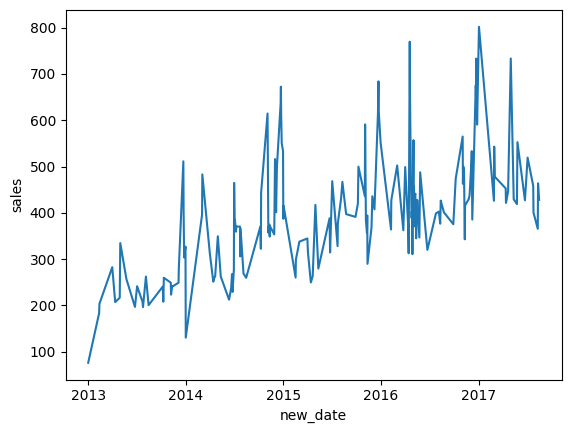

In [143]:
#Time Series plot of the sales data
sns.lineplot(x='new_date',y='sales',data=df,errorbar=None,estimator='mean')
# Replace infinite values with NaN in the DataFrame
#df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Proceed with plotting
#sns.lineplot(x='new_date', y='sales', data=df, errorbar=None, estimator='mean')

In [144]:
df[["year", "month", "day"]] = df["date"].str.split("-", expand = True)


df['month'] = df['month'].replace(
    ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'],
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
)

df['month'] = pd.Categorical(df['month'],
                                   categories=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],
                                   ordered=True)
df['day'] = pd.Categorical(df['day'],categories=['01','02','03','04','05','06','07','08','09','10','11', '12', '14','15','16','17','18','19','20','21','22','23', '24', '25', '26', '27','28','29','30','31'],ordered=True)
        
    

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='month', ylabel='sales'>

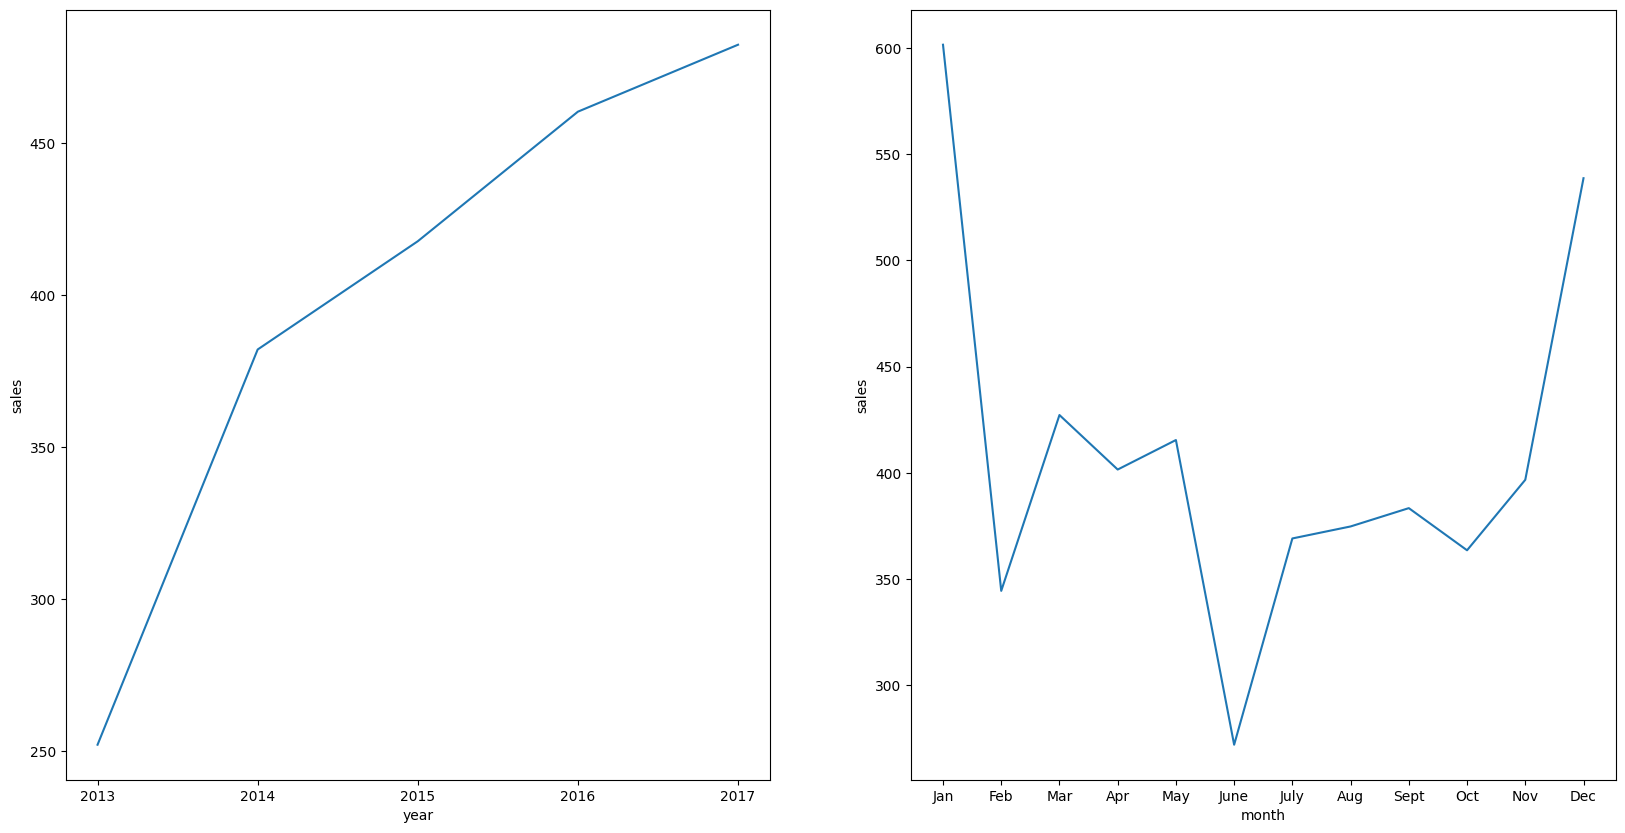

In [145]:
#plotting the monthwise sales trend
#f,ax=plt.subplots(1,2,figsize=(20,10))
#sns.lineplot(x='year',y='sales',data=df,errorbar=None,estimator='mean',ax=ax[0])
#sns.lineplot(x='month',y='sales',data=df,errorbar=None,estimator='mean',ax=ax[1])

df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plotting the monthwise sales trend
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.lineplot(x='year', y='sales', data=df, errorbar=None, estimator='mean', ax=ax[0])
sns.lineplot(x='month', y='sales', data=df, errorbar=None, estimator='mean', ax=ax[1])

In [146]:
df['family'].nunique()

33

In [147]:



df['family'] = df['family'].replace(['AUTOMOTIVE', 'HARDWARE', 'LAWN AND GARDEN', 'PLAYERS AND ELECTRONICS'], 'Tools')
df['family'] = df['family'].replace(['BEAUTY', 'LINGERIE', 'LADIESWEAR', 'PERSONAL CARE', 'CELEBRATION', 'MAGAZINES', 'BOOKS', 'BABY CARE'], 'LifeStyle')
df['family'] = df['family'].replace(['HOME APPLIANCES', 'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME CARE', 'SCHOOL AND OFFICE SUPPLIES'], 'Home')
df['family'] = df['family'].replace(['GROCERY II', 'PET SUPPLIES', 'SEAFOOD', 'LIQUOR,WINE,BEER'], 'Food')
df['family'] = df['family'].replace(['DELI', 'EGGS'], 'Daily')

In [148]:
#preparing the train and test datasets which would be used for prediction later


train['family'] = train['family'].replace(['AUTOMOTIVE', 'HARDWARE', 'LAWN AND GARDEN', 'PLAYERS AND ELECTRONICS'], 'Tools')
train['family'] = train['family'].replace(['BEAUTY', 'LINGERIE', 'LADIESWEAR','PERSONAL CARE','CELEBRATION','MAGAZINES','BOOKS', 'BABY CARE'], 'LifeStyle')
train['family'] = train['family'].replace(['HOME APPLIANCES','HOME AND KITCHEN I', 'HOME AND KITCHEN II','HOME CARE','SCHOOL AND OFFICE SUPPLIES'], 'Home')
train['family'] = train['family'].replace([ 'GROCERY II', 'PET SUPPLIES','SEAFOOD','LIQUOR,WINE,BEER'], 'Food')
train['family'] = train['family'].replace(['DELI', 'EGGS'], 'Daily')

test['family'] = test['family'].replace(['AUTOMOTIVE', 'HARDWARE', 'LAWN AND GARDEN', 'PLAYERS AND ELECTRONICS'], 'Tools')
test['family'] = test['family'].replace(['BEAUTY', 'LINGERIE', 'LADIESWEAR','PERSONAL CARE','CELEBRATION','MAGAZINES','BOOKS', 'BABY CARE'], 'LifeStyle')
test['family'] = test['family'].replace(['HOME APPLIANCES','HOME AND KITCHEN I', 'HOME AND KITCHEN II','HOME CARE','SCHOOL AND OFFICE SUPPLIES'], 'Home')
test['family'] = test['family'].replace([ 'GROCERY II', 'PET SUPPLIES','SEAFOOD','LIQUOR,WINE,BEER'], 'Food')
test['family'] = test['family'].replace(['DELI', 'EGGS'], 'Daily')


<Axes: xlabel='sales', ylabel='family'>

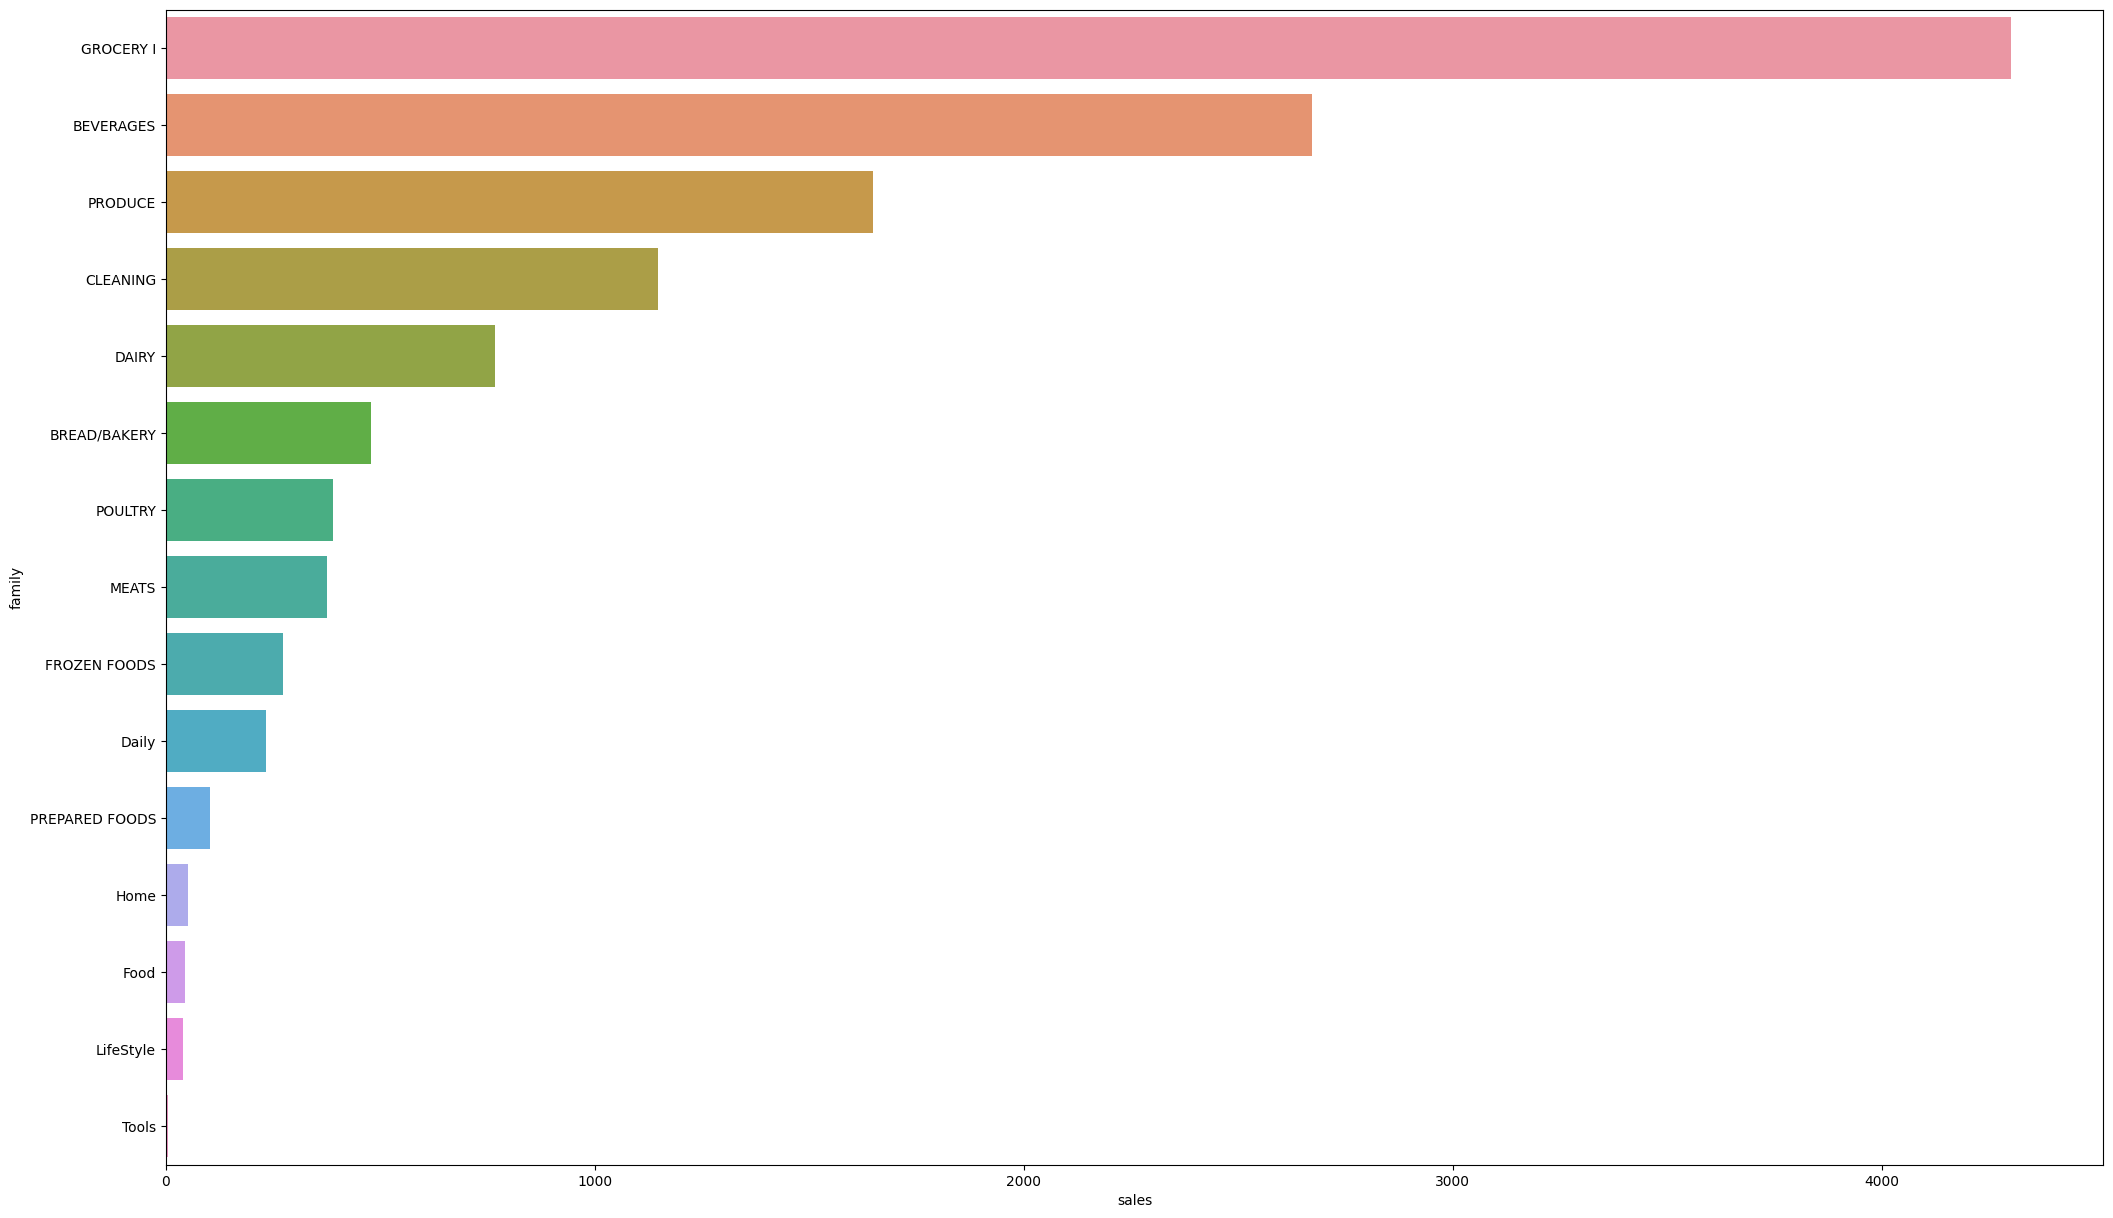

In [149]:
#Plotting the sales using bar-plot w.r.t to 'family' categories.

d=df.groupby('family')['sales'].mean().sort_values(ascending=False)
d=pd.DataFrame(d)
df.sales= pd.to_numeric(df.sales, errors='coerce')
ax,f=plt.subplots(figsize=(25,15))
sns.barplot(x='sales',y=d.index,data=d,ax=None,errorbar=None)

<Axes: xlabel='store_nbr', ylabel='sales'>

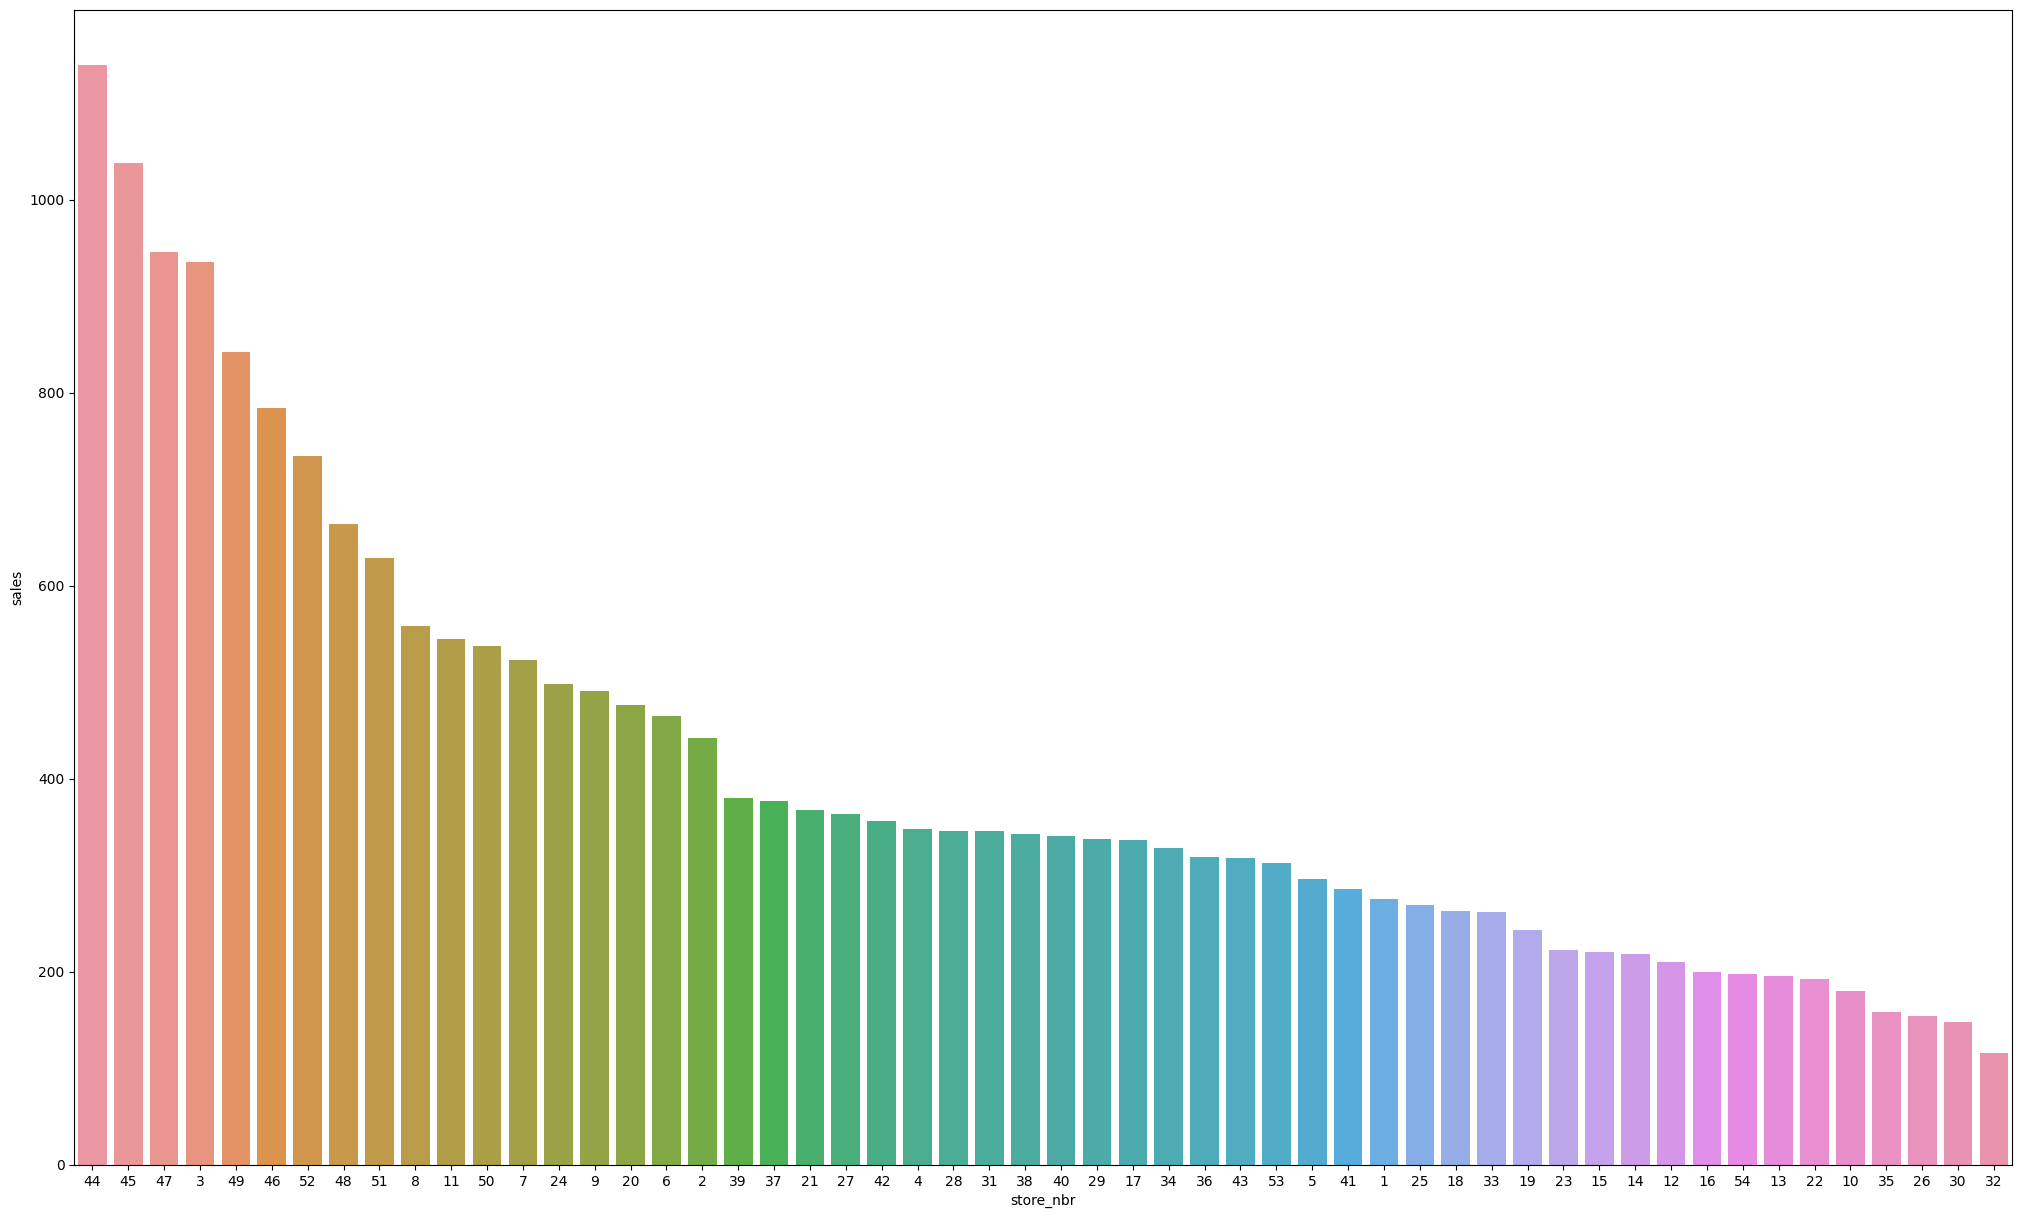

In [150]:
#Plot of sales w.r.t store number

s=df.groupby('store_nbr')['sales'].mean().sort_values(ascending=False)
s=pd.DataFrame(s)
ax,f=plt.subplots(figsize=(25,15))
sns.barplot(x=s.index,y='sales',data=s,ax=None,errorbar=None,order=s.index)

In [151]:
#we will make new columns

df['city_state']=df['city']+"_"+df['state']
df['type_locale']=df['type_y']+"_"+"locale"

city_state=df[(df['store_nbr']==44)|(df['store_nbr']==45)|(df['store_nbr']==47)|(df['store_nbr']==30)|(df['store_nbr']==32)][['city_state','store_nbr']]
city_state.value_counts()

city_state        store_nbr
Guayaquil_Guayas  32           6402
Quito_Pichincha   44           6402
                  45           6402
                  47           6402
Guayaquil_Guayas  30           6303
Name: count, dtype: int64

<Axes: xlabel='sales', ylabel='city_state'>

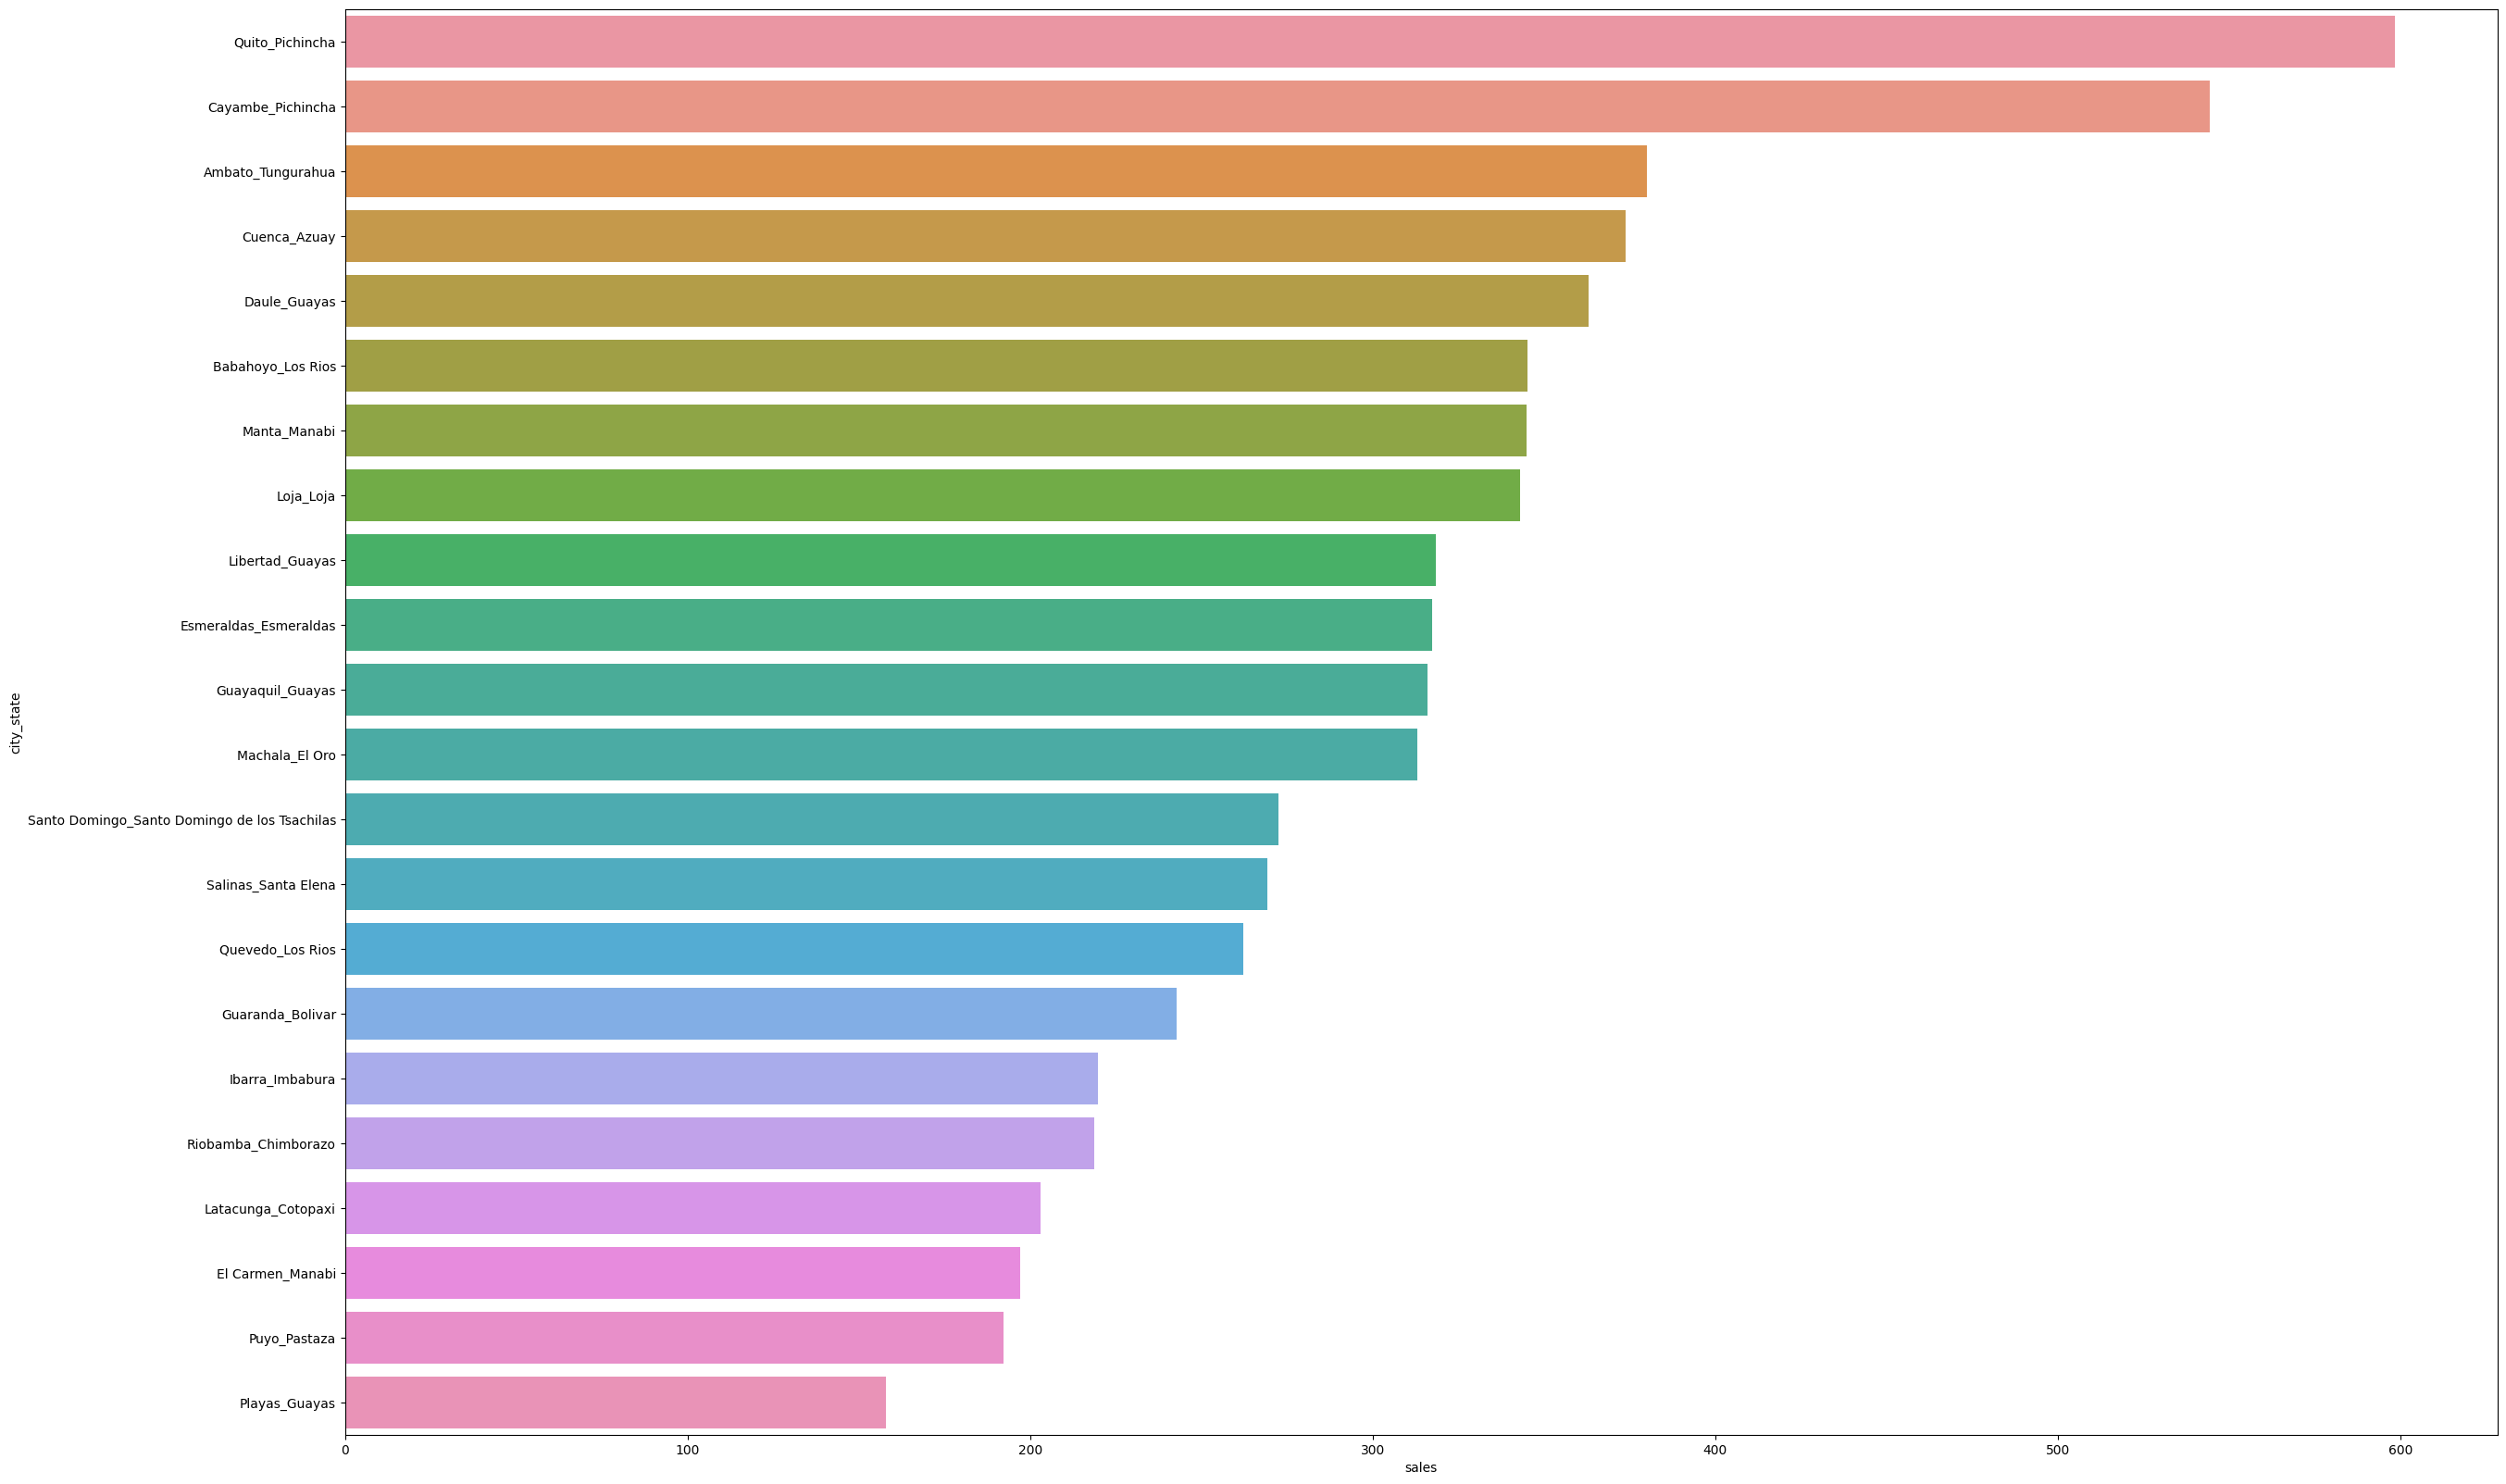

In [152]:
temp=df.groupby(['city_state'])['sales'].mean().sort_values(ascending=False)
temp=pd.DataFrame(x)
ax,f=plt.subplots(figsize=(30,20))
sns.barplot(x='sales',y=temp.index,data=temp,ax=None,errorbar=None)

# Data

Now i will begin use catboost

In [153]:
holidays=pd.read_csv('../input/store-sales-time-series-forecasting/holidays_events.csv')
oil=pd.read_csv('../input/store-sales-time-series-forecasting/oil.csv')
stores=pd.read_csv('../input/store-sales-time-series-forecasting/stores.csv')
test=pd.read_csv('../input/store-sales-time-series-forecasting/test.csv')
train=pd.read_csv('../input/store-sales-time-series-forecasting/train.csv')
transactions=pd.read_csv('../input/store-sales-time-series-forecasting/transactions.csv')

In [154]:
def merge_data(df):
    df = df \
        .merge(stores, left_on="store_nbr", right_on="store_nbr", how="left") \
        .rename(columns={"type": "store_type"}) \
        .merge(transactions, left_on=["date", "store_nbr"], right_on=["date", "store_nbr"], how="left") \
        .merge(holidays, left_on="date", right_on="date", how="left") \
        .drop_duplicates(subset="id") \
        .rename(columns={"type": "holiday_type"}) \
        .merge(oil, left_on="date", right_on="date", how="left") 
    return df


In [155]:
def fill_na(df):
    df['holiday_type'] = df['holiday_type'].fillna('Common')
    df['locale'] = df['locale'].fillna('Common')
    df['description'] = df['description'].fillna('Unknown')
    df['transferred'] = df['transferred'].fillna(False)
    df['dcoilwtico'] = df['dcoilwtico'].fillna(method='backfill')
    return df
# def fill_na(df):
#     df['transferred'] = df['transferred'].fillna(False).astype(bool).infer_objects()
#     df['dcoilwtico'] = df['dcoilwtico'].bfill().astype(df['dcoilwtico'].dtype)
#     return df

In [156]:
# # Calendar features
# def create_date_features(df):
#     df['month'] = df.date.dt.month
#     df['day_of_month'] = df.date.dt.day
#     df['day_of_year'] = df.date.dt.dayofyear
#     df['week_of_year'] = df.date.dt.weekofyear
#     df['day_of_week'] = df.date.dt.dayofweek
#     df['year'] = df.date.dt.year
#     return df

def create_date_features(df):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    df['day_of_month'] = df['date'].dt.day
    df['day_of_year'] = df['date'].dt.dayofyear
    df['week_of_year'] = df['date'].dt.isocalendar().week
    df['day_of_week'] = df['date'].dt.dayofweek
    df['year'] = df['date'].dt.year
    return df

In [157]:
def lag_features(df, lags):
    # Iterate over each lag value specified in the lags list
    for lag in lags:
        # Create a new column in the DataFrame for each lag value
        df[f"sales_t-{lag}"] = df.groupby(["store_nbr", "family"])["sales"].transform(
            # Apply the shift operation to the sales data within each group
            lambda x: x.shift(lag)
        )
    # Return the DataFrame with the lagged features added
    return df

In [158]:
def roll_mean_features(df, windows):
    # Iterate over each window size specified in the windows list
    for window in windows:
        # Create a new column in the DataFrame for each window size
        df['sales_roll_mean_' + str(window)] = df.groupby(["store_nbr", "family"])['sales']. \
                                                          transform(
            # Apply the rolling mean operation to the sales data within each group
            lambda x: x.shift(16).rolling(window=window, min_periods=7, win_type="triang").mean())
    # Return the DataFrame with the rolling mean features added
    return df

In [159]:
def ewm_features(df, alphas_list, lags_list):
    # Iterate over each combination of alpha and lag values
    for alpha_val in alphas_list:
        for lag_val in lags_list:
            # Create a new column name based on alpha and lag values
            column_name = f"sales_ewm_alpha_{str(alpha_val).replace('.', '')}_lag_{lag_val}"
            # Calculate EWMA and assign the result to the new column
            df[column_name] = df.groupby(["store_nbr", "family"])['sales'].transform(
                lambda x: x.shift(lag_val).ewm(alpha=alpha_val).mean()
            )
    return df


In [160]:
use_cols = ['date','store_nbr','family','sales','onpromotion','cluster','holiday_type', 
    'locale','description','transferred','dcoilwtico']

In [161]:
data = pd.concat([train, test], axis=0)
data = merge_data(data)
data = data[use_cols]
data = fill_na(data)

data['date'] = pd.to_datetime(data['date'])

data = create_date_features(data)
data = lag_features(data, lags=[*range(1, 31), 90, 180, 364])
data = roll_mean_features(data, [16,17,18,30])
data = ewm_features(data, [0.95, 0.9, 0.8, 0.5], [1, 7, 30])

/tmp/ipykernel_34/966503691.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['transferred'] = df['transferred'].fillna(False)
/tmp/ipykernel_34/966503691.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['dcoilwtico'] = df['dcoilwtico'].fillna(method='backfill')


In [162]:
#splitting the train dataset into train and test

# from sklearn.model_selection import train_test_split

# data = data.query("date > '2013-12-31'")
# X = data.query("date <= '2017-08-15'")
# X_test = data.query("date > '2017-08-15'")
# X.drop(['date'], inplace=True, axis=1)
# X_test.drop(['date', 'year'], inplace=True, axis=1)

# Y = X['sales']
# X = X.drop(['sales', 'year'], axis=1)
# X_test = X_test.drop(['sales'], axis=1)

# X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.model_selection import train_test_split

# Make copies of the DataFrames
data_copy = data.copy()
X = data_copy.query("date <= '2017-08-15'")
X_test = data_copy.query("date > '2017-08-15'")

# Drop columns from the copied DataFrames
X.drop(['date'], inplace=True, axis=1)
X_test.drop(['date', 'year'], inplace=True, axis=1)

# Remove original DataFrame to avoid confusion
del data_copy

Y = X['sales']
X = X.drop(['sales', 'year'], axis=1)
X_test = X_test.drop(['sales'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)



/tmp/ipykernel_34/1790153013.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['date'], inplace=True, axis=1)
/tmp/ipykernel_34/1790153013.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(['date', 'year'], inplace=True, axis=1)


In [163]:
data


,date,store_nbr,family,sales,onpromotion,cluster,holiday_type,locale,description,transferred,...,sales_ewm_alpha_095_lag_30,sales_ewm_alpha_09_lag_1,sales_ewm_alpha_09_lag_7,sales_ewm_alpha_09_lag_30,sales_ewm_alpha_08_lag_1,sales_ewm_alpha_08_lag_7,sales_ewm_alpha_08_lag_30,sales_ewm_alpha_05_lag_1,sales_ewm_alpha_05_lag_7,sales_ewm_alpha_05_lag_30
0,2013-01-01,1,AUTOMOTIVE,0.0,0,13,Holiday,National,Primer dia del ano,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,1,BABY CARE,0.0,0,13,Holiday,National,Primer dia del ano,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01,1,BEAUTY,0.0,0,13,Holiday,National,Primer dia del ano,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01,1,BEVERAGES,0.0,0,13,Holiday,National,Primer dia del ano,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01,1,BOOKS,0.0,0,13,Holiday,National,Primer dia del ano,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,2017-08-31,9,POULTRY,NaN,1,6,Common,Common,Unknown,False,...,565.318991,423.935714,423.935714,560.611289,412.276337,412.276337,551.421713,392.438031,392.438031,518.514476
3029396,2017-08-31,9,PREPARED FOODS,NaN,0,6,Common,Common,Unknown,False,...,51.246066,150.443153,150.443153,52.444705,146.278339,146.278339,56.022566,134.243896,134.243896,72.911551
3029397,2017-08-31,9,PRODUCE,NaN,1,6,Common,Common,Unknown,False,...,2423.706728,2315.775659,2315.775659,2378.620204,2217.030205,2217.030205,2292.418673,1934.923106,1934.923106,2035.920473
3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,6,Common,Common,Unknown,False,...,195.609900,127.218224,127.218224,188.128407,133.426673,133.426673,172.814546,148.242507,148.242507,122.237914


In [164]:
data[data.date == '2014-01-02'][['sales_t-1', 'sales', 'date']].head(10)


,sales_t-1,sales,date
650430,0.0,3.000,2014-01-02
650431,0.0,0.000,2014-01-02
650432,0.0,6.000,2014-01-02
650433,0.0,2524.000,2014-01-02
650434,0.0,0.000,2014-01-02
650435,0.0,388.988,2014-01-02
650436,0.0,12.000,2014-01-02
650437,0.0,852.000,2014-01-02
650438,0.0,772.000,2014-01-02
650439,0.0,141.484,2014-01-02


In [165]:
data[data.date == '2014-01-03'][['sales_t-1', 'sales', 'date']].head(10)


,sales_t-1,sales,date
652212,3.000,0.000,2014-01-03
652213,0.000,0.000,2014-01-03
652214,6.000,5.000,2014-01-03
652215,2524.000,2192.000,2014-01-03
652216,0.000,0.000,2014-01-03
652217,388.988,312.102,2014-01-03
652218,12.000,21.000,2014-01-03
652219,852.000,871.000,2014-01-03
652220,772.000,689.000,2014-01-03
652221,141.484,118.365,2014-01-03


In [166]:
import math

class RMSLE(object):
    def calc_ders_range(self, approxes, targets, weights):
        assert len(approxes) == len(targets)
        if weights is not None:
            assert len(weights) == len(approxes)

        result = []
        for index in range(len(targets)):
            val = max(approxes[index], 0)
            der1 = math.log1p(targets[index]) - math.log1p(max(0, approxes[index]))
            der2 = -1 / (max(0, approxes[index]) + 1)

            if weights is not None:
                der1 *= weights[index]
                der2 *= weights[index]

            result.append((der1, der2))
        return result

class RMSLE_val(object):
    def get_final_error(self, error, weight):
        return np.sqrt(error / (weight + 1e-38))

    def is_max_optimal(self):
        return False

    def evaluate(self, approxes, target, weight):
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])

        approx = approxes[0]

        error_sum = 0.0
        weight_sum = 0.0

        for i in range(len(approx)):
            w = 1.0 if weight is None else weight[i]
            weight_sum += w
            error_sum += w * ((math.log1p(max(0, approx[i])) - math.log1p(max(0, target[i])))**2)

        return error_sum, weight_sum

In [167]:
X_train


,store_nbr,family,onpromotion,cluster,holiday_type,locale,description,transferred,dcoilwtico,month,...,sales_ewm_alpha_095_lag_30,sales_ewm_alpha_09_lag_1,sales_ewm_alpha_09_lag_7,sales_ewm_alpha_09_lag_30,sales_ewm_alpha_08_lag_1,sales_ewm_alpha_08_lag_7,sales_ewm_alpha_08_lag_30,sales_ewm_alpha_05_lag_1,sales_ewm_alpha_05_lag_7,sales_ewm_alpha_05_lag_30
2902383,45,AUTOMOTIVE,2,11,Common,Common,Unknown,False,42.48,6,...,15.215612,1.071214e+01,8.166916,15.454804,1.064943e+01,9.293443,15.957321,11.525777,12.649731,16.892576
1651514,47,PREPARED FOODS,0,14,Common,Common,Unknown,False,50.11,7,...,226.100706,3.387797e+02,285.621802,226.841660,3.319127e+02,283.251761,228.223590,301.628512,274.631762,235.382810
1948349,26,PREPARED FOODS,0,10,Common,Common,Unknown,False,36.81,1,...,30.295118,1.267851e+00,21.424972,29.589972,2.508859e+00,20.915563,28.225754,6.782829,20.101079,24.978125
2893871,7,BEAUTY,1,8,Common,Common,Unknown,False,44.73,6,...,3.950269,4.179729e+00,2.828324,3.902316,4.316077e+00,2.709385,3.821209,4.386025,2.705610,3.940422
2867501,16,SEAFOOD,0,3,Common,Common,Unknown,False,47.68,6,...,1.102007,9.189927e-01,2.731518,1.206137,8.718418e-01,2.528515,1.410666,0.878481,2.222799,1.882310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692743,54,DAIRY,0,3,Holiday,National,Primer Grito de Independencia,False,44.94,8,...,198.884119,2.746535e+02,256.400405,193.954241,2.635533e+02,260.820910,184.783682,227.816976,259.286450,167.126047
2356330,23,SCHOOL AND OFFICE SUPPLIES,0,9,Common,Common,Unknown,False,48.20,8,...,0.047500,9.000001e-12,0.000009,0.090000,1.638421e-08,0.000256,0.160000,0.000246,0.015755,0.250000
2229084,53,AUTOMOTIVE,0,13,Common,Common,Unknown,False,50.37,6,...,30.600501,1.174749e+01,12.446229,30.104040,1.237710e+01,12.162520,28.833814,13.363271,12.249335,23.241544
2768307,33,BEVERAGES,15,3,Common,Common,Unknown,False,52.25,4,...,1006.407924,1.498159e+03,2137.904305,1020.956586,1.578656e+03,2074.624825,1064.439666,1910.359256,1957.992399,1288.860982


In [168]:
from catboost import CatBoostRegressor


object_cols = np.where(X_train.dtypes == 'object')[0]

catboost_params = {
    'iterations': 1000,
    'early_stopping_rounds': 100,
    'learning_rate': 0.05,
    'eval_metric':  RMSLE_val(),
    'loss_function': RMSLE(),
    'use_best_model': True,
    'verbose': 250,
    'max_depth': 5,
    'cat_features': object_cols
}

# one-hot encode the categorical features

# train the model
model = CatBoostRegressor(**catboost_params)
model.fit(X_train, y_train, eval_set=(X_valid, y_valid))

0:	learn: 3.8101268	test: 3.8108625	best: 3.8108625 (0)	total: 6.77s	remaining: 1h 52m 42s
250:	learn: 0.4535260	test: 0.4542165	best: 0.4542165 (250)	total: 19m 3s	remaining: 56m 51s
500:	learn: 0.4341021	test: 0.4353939	best: 0.4353939 (500)	total: 37m 57s	remaining: 37m 48s
750:	learn: 0.4246670	test: 0.4261399	best: 0.4261399 (750)	total: 57m 5s	remaining: 18m 55s
999:	learn: 0.4188135	test: 0.4206404	best: 0.4206404 (999)	total: 1h 15m 48s	remaining: 0us

bestTest = 0.4206403629
bestIteration = 999



In [169]:
def recursive_predict(model):
    global X_test
    output = np.array([])
    for day in range(16, 32):
        pred = model.predict(X_test.query(f"day_of_month == {day}"))
        pred[pred < 0] = 0
        output = np.concatenate([output, pred], axis=0)
        for k in range(day+1, 32):
            X_test.loc[X_test[X_test["day_of_month"] == k].index, f"sales_t-{k-day}"] = pred
    return output

In [170]:
pred = recursive_predict(model)
X_test = data.query("date > '2017-08-15'")
X_test.drop(['date', 'year', 'sales'], inplace=True, axis=1)

final_submission = pd.DataFrame({'id': X_test.index, 'sales': pred})
final_submission

/tmp/ipykernel_34/2198113612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(['date', 'year', 'sales'], inplace=True, axis=1)


,id,sales
0,3000888,3.704140
1,3000889,0.018638
2,3000890,4.725792
3,3000891,2012.947413
4,3000892,0.085655
...,...,...
28507,3029395,359.627020
28508,3029396,120.070619
28509,3029397,1868.904506
28510,3029398,127.111801


In [171]:
final_submission.to_csv('submission.csv', index=False)